In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("..")
BASE_DIR = Path.cwd().parent
data_path = BASE_DIR / "data"

In [7]:
files = sorted(data_path.glob("atp_matches_*.csv"))
files

[WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1968.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1969.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1970.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1971.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1972.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1973.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1974.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1975.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1976.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-mat

The final goal of this project is to see who would win? Novak Djokovic or his idol Pete Sampras. In previous notebook we explored the data from 2024. and trained the models only based on that year's data. Now, in order to get the answer we need to create much bigger dataset that includes more years from Pete's era and also Novak's. We have data from 1968. all the way to 2024. We don't need all of it.

In [8]:
years = list(range(1991, 2025))

files = [data_path / f"atp_matches_{year}.csv" for year in years]

files

[WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1991.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1992.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1993.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1994.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1995.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1996.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1997.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1998.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-match-winner-prediction/data/atp_matches_1999.csv'),
 WindowsPath('c:/Users/ThinkPad T450/Desktop/tennis-mat

In [9]:
from src.preprocessing import transform_matches #I took tm function from 01 notebook and made a script to reuse it

df_list = []

for f in files:
    print("Processing file: ", f)

    df = pd.read_csv(f)

    df = df[['tourney_name', 'surface', 'draw_size', 'tourney_level',
             'tourney_date', 'winner_id', 'winner_name', 'winner_hand',
             'winner_age', 'loser_id', 'loser_name', 'loser_hand', 'loser_age',
             'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 
             'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 
             'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 
             'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
             'winner_rank', 'loser_rank']]

    df2 = transform_matches(df)

    df_list.append(df2)

df_full = pd.concat(df_list, ignore_index=True)
df_full.shape

Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1991.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1992.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1993.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1994.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1995.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1996.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1997.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1998.csv
Processing file:  c:\Users\ThinkPad T450\Desktop\tennis-match-winner-prediction\data\atp_matches_1999.csv
Processing file:  c:\Users\ThinkPad T450\Deskt

(216750, 33)

Now we have enormous dataset of 216.750 rows!

In [10]:
df_full.head()

,player_id,player_name,player_hand,player_age,opp_id,opp_name,opp_hand,opp_age,player_ace,player_df,...,opp_SvGms,opp_bpSaved,opp_bpFaced,surface,tourney_level,best_of,minutes,player_rank,opp_rank,label
0,101723,Magnus Larsson,R,20.7,101414,Boris Becker,R,23.1,6.0,2.0,...,16.0,6.0,8.0,Hard,A,3,130.0,56.0,2.0,1
1,100946,Slobodan Zivojinovic,R,27.4,101256,Mark Kratzmann,L,24.6,19.0,4.0,...,15.0,1.0,2.0,Hard,A,3,119.0,304.0,75.0,1
2,101234,Patrik Kuhnen,R,24.8,101421,Veli Paloheimo,R,23.0,6.0,1.0,...,8.0,4.0,8.0,Hard,A,3,71.0,82.0,69.0,1
3,101889,Todd Woodbridge,R,19.7,101703,Guillaume Raoux,R,20.8,2.0,0.0,...,10.0,5.0,8.0,Hard,A,3,85.0,50.0,84.0,1
4,101274,Udo Riglewski,R,24.4,101843,Sergi Bruguera,R,19.9,4.0,2.0,...,11.0,4.0,8.0,Hard,A,3,90.0,88.0,28.0,1


In [11]:
stats_cols = [
    'player_SvGms', 'opp_SvGms',
    'player_ace', 'player_df', 'player_svpt', 'player_1stIn', 'player_1stWon', 
    'player_2ndWon', 'player_bpSaved', 'player_bpFaced',
    'opp_ace', 'opp_df', 'opp_svpt', 'opp_1stIn', 'opp_1stWon', 
    'opp_2ndWon', 'opp_bpSaved', 'opp_bpFaced'
]

df_full = df_full.dropna(subset=stats_cols)

df_full = df_full.dropna(subset=['player_rank', 'opp_rank'])

df_full['player_age'] = df_full['player_age'].fillna(df_full['player_age'].median())
df_full['opp_age'] = df_full['opp_age'].fillna(df_full['opp_age'].median())

df_full['minutes'] = df_full['minutes'].fillna(df_full['minutes'].median())

There is one thing that we need to handle, we didn't do in previous notebook.

In [12]:
df_full['surface'].unique()

array(['Hard', 'Carpet', 'Clay', 'Grass'], dtype=object)

In 90s there was a <b>Carpet</b> surface. ATP discarded this surface long time ago. Since Djokovic didn't play on this surface, we will get rid of all matches which were played on Carpet surface.

In [13]:
df_full = df_full[df_full['surface'].isin(['Clay', 'Hard', 'Grass'])]

In [14]:
df_full.shape

(182774, 33)

In [15]:
df_full.isna().sum().sort_values(ascending=False)

player_id         0
player_name       0
player_hand       0
player_age        0
opp_id            0
opp_name          0
opp_hand          0
opp_age           0
player_ace        0
player_df         0
player_svpt       0
player_1stIn      0
player_1stWon     0
player_2ndWon     0
player_SvGms      0
player_bpSaved    0
player_bpFaced    0
opp_ace           0
opp_df            0
opp_svpt          0
opp_1stIn         0
opp_1stWon        0
opp_2ndWon        0
opp_SvGms         0
opp_bpSaved       0
opp_bpFaced       0
surface           0
tourney_level     0
best_of           0
minutes           0
player_rank       0
opp_rank          0
label             0
dtype: int64

As we did last time, we handled all missing values. Now let's do the feature engineering on data_full.

In [16]:
df_full['rank_diff'] = df_full['player_rank'] - df_full['opp_rank']
df_full['age_diff']  = df_full['player_age']  - df_full['opp_age']
df_full['hand_diff'] = (df_full['player_hand'] != df_full['opp_hand']).astype(int)

In [17]:
df_full['player_1stIn_pct'] = df_full['player_1stIn'] / df_full['player_svpt']
df_full['opp_1stIn_pct']    = df_full['opp_1stIn']    / df_full['opp_svpt']


df_full['player_1stWon_pct'] = df_full['player_1stWon'] / df_full['player_1stIn']
df_full['opp_1stWon_pct']    = df_full['opp_1stWon']    / df_full['opp_1stIn']


df_full['player_2ndWon_pct'] = df_full['player_2ndWon'] / (df_full['player_svpt'] - df_full['player_1stIn'])
df_full['opp_2ndWon_pct']    = df_full['opp_2ndWon']    / (df_full['opp_svpt']    - df_full['opp_1stIn'])


In [18]:
df_full['player_bp_saved_pct'] = df_full['player_bpSaved'] / df_full['player_bpFaced']
df_full['opp_bp_saved_pct']    = df_full['opp_bpSaved']    / df_full['opp_bpFaced']

df_full = df_full.replace([np.inf, -np.inf], np.nan) # Again, division by 0 handle
df_full = df_full.dropna(subset=[
    'player_1stIn_pct', 'opp_1stIn_pct',
    'player_1stWon_pct', 'opp_1stWon_pct',
    'player_2ndWon_pct', 'opp_2ndWon_pct',
    'player_bp_saved_pct', 'opp_bp_saved_pct'
])

In [19]:
features = [
    'player_1stIn_pct', 'opp_1stIn_pct',
    'player_1stWon_pct', 'opp_1stWon_pct',
    'player_2ndWon_pct', 'opp_2ndWon_pct',
    'player_bp_saved_pct', 'opp_bp_saved_pct',
    'rank_diff', 'age_diff', 'hand_diff',
    'best_of', 'minutes',
    'surface', 'tourney_level'
]

target = 'label'

In [20]:
X = df_full[features]
y = df_full[target]

In [21]:
X = pd.get_dummies(X, columns=['surface', 'tourney_level'], drop_first=True)

In [22]:
X.dtypes

player_1stIn_pct       float64
opp_1stIn_pct          float64
player_1stWon_pct      float64
opp_1stWon_pct         float64
player_2ndWon_pct      float64
opp_2ndWon_pct         float64
player_bp_saved_pct    float64
opp_bp_saved_pct       float64
rank_diff              float64
age_diff               float64
hand_diff                int64
best_of                  int64
minutes                float64
surface_Grass             bool
surface_Hard              bool
tourney_level_D           bool
tourney_level_F           bool
tourney_level_G           bool
tourney_level_M           bool
tourney_level_O           bool
dtype: object

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000))
])

lr.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [25]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

y_lr_pred = lr.predict(X_test)
y_lr_prob = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_lr_pred))
print("LR AUC: ", roc_auc_score(y_test, y_lr_prob))
print("LR CM: \n", confusion_matrix(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     16644
           1       0.93      0.93      0.93     16644

    accuracy                           0.93     33288
   macro avg       0.93      0.93      0.93     33288
weighted avg       0.93      0.93      0.93     33288

LR AUC:  0.9809493181815949
LR CM: 
 [[15453  1191]
 [ 1248 15396]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_rf_pred = rf.predict(X_test)
y_rf_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_rf_pred))
print("RF AUC: ", roc_auc_score(y_test, y_rf_prob))
print("RF CM: \n", confusion_matrix(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     16644
           1       0.93      0.93      0.93     16644

    accuracy                           0.93     33288
   macro avg       0.93      0.93      0.93     33288
weighted avg       0.93      0.93      0.93     33288

RF AUC:  0.9832387854980972
RF CM: 
 [[15542  1102]
 [ 1236 15408]]


In [28]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20)

opp_1stWon_pct         0.188487
player_1stWon_pct      0.188394
opp_2ndWon_pct         0.131016
player_2ndWon_pct      0.129631
player_bp_saved_pct    0.091832
opp_bp_saved_pct       0.090830
rank_diff              0.041380
opp_1stIn_pct          0.033392
player_1stIn_pct       0.033107
minutes                0.032526
age_diff               0.021926
surface_Hard           0.003587
hand_diff              0.003262
tourney_level_M        0.002965
best_of                0.002323
tourney_level_G        0.002254
surface_Grass          0.002154
tourney_level_D        0.000586
tourney_level_F        0.000317
tourney_level_O        0.000032
dtype: float64

Both models did amazing with <b>93% accuracy</b>. RFClassifier has little bit better AUC, but difference is tiny. Again there is no bias towards winns or loses which is perfect! Training RF took almost 1 minute even tho n_jobs parameter is set to -1 which means that CPU will use all free cores to train.

Next step is to build predict_match function that will pull player stats from dataset, build a feature vector with all predictors, feed the model and return probabilities of each player winning the match, and also give explanation of which stats favored whom.

But before we build the function we need to build a new table which will contain stats for each player on each surface. We want to sum serve stats over all matches, compute percentages per surface, average rank and age per surface and calculate overall number of matches played on each surface.

In [40]:
player_surface_stats = (
    df_full
    .groupby(['player_name', 'surface'], as_index=False)
    .agg({
        'player_svpt' : 'sum',
        'player_1stIn': 'sum',
        'player_1stWon': 'sum',
        'player_2ndWon': 'sum',
        'player_bpSaved': 'sum',
        'player_bpFaced': 'sum',
        'player_age': 'mean',
        'player_rank': 'mean',
        'label': 'count'
    })
    .rename(columns={'label': 'n_matches', 'player_rank': 'avg_rank', 'player_age': 'avg_age'})
)

player_surface_stats['player_1stIn_pct']   = player_surface_stats['player_1stIn'] / player_surface_stats['player_svpt']
player_surface_stats['player_1stWon_pct']  = player_surface_stats['player_1stWon'] / player_surface_stats['player_1stIn']
player_surface_stats['player_2ndWon_pct']  = player_surface_stats['player_2ndWon'] / (player_surface_stats['player_svpt'] - player_surface_stats['player_1stIn'])
player_surface_stats['player_bp_saved_pct'] = player_surface_stats['player_bpSaved'] / player_surface_stats['player_bpFaced']

player_surface_stats = player_surface_stats.replace([np.inf, -np.inf], np.nan)
player_surface_stats = player_surface_stats.dropna(subset=['player_1stIn_pct', 'player_1stWon_pct', 'player_2ndWon_pct', 'player_bp_saved_pct'])

player_surface_stats.to_csv(BASE_DIR / "data" / "player_surface_stats.csv", index=False)

player_surface_stats.head()


,player_name,surface,player_svpt,player_1stIn,player_1stWon,player_2ndWon,player_bpSaved,player_bpFaced,avg_age,avg_rank,n_matches,player_1stIn_pct,player_1stWon_pct,player_2ndWon_pct,player_bp_saved_pct
0,Aaron Krickstein,Clay,3575.0,2065.0,1352.0,703.0,228.0,405.0,25.568182,46.181818,44,0.577622,0.654722,0.465563,0.562963
1,Aaron Krickstein,Grass,1768.0,1063.0,770.0,330.0,95.0,155.0,26.300000,62.000000,14,0.601244,0.724365,0.468085,0.612903
2,Aaron Krickstein,Hard,11040.0,6466.0,4444.0,2374.0,613.0,1003.0,25.768992,41.356589,129,0.585688,0.687287,0.519021,0.611167
3,Abdullah Maqdas,Hard,316.0,247.0,149.0,33.0,19.0,33.0,29.800000,1298.000000,2,0.781646,0.603239,0.478261,0.575758
4,Abedallah Shelbayh,Clay,212.0,115.0,76.0,37.0,15.0,26.0,19.400000,259.000000,3,0.542453,0.660870,0.381443,0.576923


Let's now check if we have Novak and Pete stats for all 3 surfaces in this table.

In [30]:
player_surface_stats[player_surface_stats['player_name'].str.contains('Novak Djokovic')]

,player_name,surface,player_svpt,player_1stIn,player_1stWon,player_2ndWon,player_bpSaved,player_bpFaced,avg_age,avg_rank,n_matches,player_1stIn_pct,player_1stWon_pct,player_2ndWon_pct,player_bp_saved_pct
3279,Novak Djokovic,Clay,25813.0,16953.0,11907.0,4768.0,1315.0,2084.0,27.487025,10.183544,316,0.656762,0.702354,0.538149,0.630998
3280,Novak Djokovic,Grass,11855.0,7860.0,6047.0,2191.0,497.0,716.0,27.264706,8.697479,119,0.663011,0.769338,0.548436,0.694134
3281,Novak Djokovic,Hard,55022.0,35145.0,26057.0,10954.0,2443.0,3695.0,26.747309,4.790368,706,0.638745,0.741414,0.551089,0.661164


In [31]:
player_surface_stats[player_surface_stats['player_name'].str.contains('Pete Sampras')]

,player_name,surface,player_svpt,player_1stIn,player_1stWon,player_2ndWon,player_bpSaved,player_bpFaced,avg_age,avg_rank,n_matches,player_1stIn_pct,player_1stWon_pct,player_2ndWon_pct,player_bp_saved_pct
3476,Pete Sampras,Clay,10118.0,5968.0,4483.0,2048.0,522.0,802.0,24.497297,3.252252,111,0.589840,0.751173,0.493494,0.650873
3477,Pete Sampras,Grass,8573.0,5349.0,4477.0,1669.0,330.0,440.0,25.263415,3.000000,82,0.623936,0.836979,0.517680,0.750000
3478,Pete Sampras,Hard,31616.0,18475.0,14941.0,6906.0,1193.0,1769.0,25.177446,3.461957,368,0.584356,0.808714,0.525531,0.674392


In [32]:
from src.prediction import predict_match, plot_serve_comparison

In [ ]:
result = predict_match(
    "Novak Djokovic",
    "Pete Sampras",
    "Hard",
    rf,
    player_surface_stats,
    X.columns
)

result

{'player1': 'Novak Djokovic',
 'player2': 'Pete Sampras',
 'surface': 'Grass',
 'p1_win_prob': 0.33666666666666667,
 'p2_win_prob': 0.6633333333333333,
 'p1_stats': {'player_name': 'Novak Djokovic',
  'surface': 'Grass',
  'player_svpt': 11855.0,
  'player_1stIn': 7860.0,
  'player_1stWon': 6047.0,
  'player_2ndWon': 2191.0,
  'player_bpSaved': 497.0,
  'player_bpFaced': 716.0,
  'avg_age': 27.264705882352942,
  'avg_rank': 8.697478991596638,
  'n_matches': 119,
  'player_1stIn_pct': 0.6630113876001688,
  'player_1stWon_pct': 0.7693384223918575,
  'player_2ndWon_pct': 0.5484355444305382,
  'player_bp_saved_pct': 0.6941340782122905},
 'p2_stats': {'player_name': 'Pete Sampras',
  'surface': 'Grass',
  'player_svpt': 8573.0,
  'player_1stIn': 5349.0,
  'player_1stWon': 4477.0,
  'player_2ndWon': 1669.0,
  'player_bpSaved': 330.0,
  'player_bpFaced': 440.0,
  'avg_age': 25.26341463414634,
  'avg_rank': 3.0,
  'n_matches': 82,
  'player_1stIn_pct': 0.6239356118045025,
  'player_1stWon_pct'

C:\Users\ThinkPad T450\AppData\Local\Temp\ipykernel_15752\155032644.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Probability for Novak Djokovic to win:  0.33666666666666667
Probability for Pete Sampras to win:  0.6633333333333333


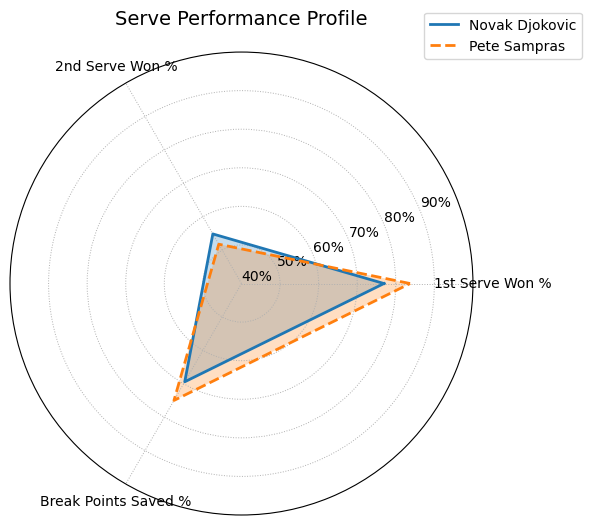

In [ ]:
fig = plot_serve_comparison(result['p1_stats'], result['p2_stats'], "Novak Djokovic", "Pete Sampras")
fig.savefig(BASE_DIR / "plots" / "Djokovic_Sampras_serve_stats_hard.png")
fig.show()
print("Probability for Novak Djokovic to win: ", result['p1_win_prob'])
print("Probability for Pete Sampras to win: ", result['p2_win_prob'])

Perfect, we got the results! Our better model (RandomForest) says that Pete Sampras would have better chances of winning this match. It gives Pete <b>66%</b>. On the other hand, Novak has <b>34%</b> chance of winning. Of course, these predictions are based only on the data we have. As we saw, our RF model uses serve stats as the most important predictors. From the chart above, we can see that Djokovic has somewhere around 75% points won on 1st serve, while Sampras has more than 80%. In my opinion, the most important data we miss are return stats. Djokovic is known for having one of the best returns in history, which would most likely allow him to neutralize Sampras's 80% 1st serve won points. 

In fact, if we take Novak's best surface which is Hard, and match up him with some strong server, for example Milos Raonic, model would give much higher chances of winning to Raonic. This doesn't mean model is wrong, model is doing what we told him to do. It is predicting based on career-average stats. Raonic serve stats on hard court are very high, because he plays lots of matches against weaker opponents because he is lower ranked and his playing style heavily biases serve statistics. On the other hand, Djokovic wins through amazing return, defense and long rallies, skills we don't have in our model. Also, Djokovic plays elite opponents much more often than Raonic does.

In order to get more real prediction, we would have to do more feature engineering and compute points won on opponent's serve, return points won, break points created or h2h win rate.  

In [39]:
import joblib

joblib.dump(rf, BASE_DIR / "models" / "rf_full.joblib")
joblib.dump(lr, BASE_DIR / "models" / "lr_full.joblib")
joblib.dump(X.columns.tolist(), BASE_DIR / "models" / "feature_columns_full.joblib")

['c:\\Users\\ThinkPad T450\\Desktop\\tennis-match-winner-prediction\\models\\feature_columns_full.joblib']